In [1]:
# Import necessary libraries
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
import os
import shutil
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import random

ResNet-50, a variant of the ResNet architecture, stands out in the field of deep learning due to its effectiveness in training very deep neural networks.
 The groundbreaking introduction of residual connections overcomes challenges such as vanishing gradients and enables successful training of networks of up to 50 layers.
 This depth enables ResNet-50 to capture complex hierarchical features, contributing to  state-of-the-art performance in a variety of computer vision tasks such as image classification, object detection, and segmentation.
 The  versatility of the architecture is leveraged through transfer learning, allowing pre-trained models to be optimized on large datasets  for specific applications.
 ResNet-50's efficiency, availability in popular frameworks, and extensive community support make it the first choice for researchers and practitioners seeking a robust and powerful deep learning solution.


In [2]:
# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')


94765736/94765736 [==============================] - 1s 0us/step


1. The function img_to_array is used to convert a PIL (Python Imaging Library) image instance or a 3D NumPy array representing an image into a 3D NumPy array with shape (width, height, channels).
2. The function np.expand_dims is used to add an extra dimension to an array at a specified position. This is helpful when we want to prepare data for operations that expect a certain number of dimensions in the input.
3. tf.cast helps to change the data type of the elements in a TensorFlow tensor to another specified data type. Here, we are casting it to float32.
4. preprocess_input is a function from the pre-trained ResNet50 model. It helps in normalization, mean subtraction, or other transformations that are necessary for the specific model architecture.


In [3]:
# Function to extract features from an image
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = tf.cast(x, tf.float32)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()

Untar the dataset zip file. This will create flower_photos folder.

In [ ]:
# Untar the dataset flower_photos.tgz
!tar -xvf flower_photos.tgz

The below lines of code will extract all the names of the flower folders inside flower_photos.

In [127]:
image_folder_path = "flower_photos"
image_files = os.listdir(image_folder_path)

In [128]:
# Removing LICENSE.txt file
image_files = [file_name for file_name in image_files if not file_name.endswith('.txt')]

Below Code extracts all the images from all the flower folders and store them in all_images folder.

In [129]:
import os
import shutil

def move_files(src_directory, dest_directory):
    # Ensure the destination directory exists, create it if necessary
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)

    # Fetch all files from the source directory
    files = [f for f in os.listdir(src_directory) if os.path.isfile(os.path.join(src_directory, f))]

    # Move each file to the destination directory
    for file_name in files:
        src_path = os.path.join(src_directory, file_name)
        dest_path = os.path.join(dest_directory, file_name)
        shutil.move(src_path, dest_path)
        print(f"Moved: {file_name}")

# Example usage
for dir in image_files:
  print(dir)
  source_directory = 'flower_photos/'+dir
  destination_directory = 'all_images'
  move_files(source_directory, destination_directory)

files = [f for f in os.listdir("all_images/") if os.path.isfile(os.path.join("all_images/", f))]
num_files = len(files)
print(num_files)

daisy
Moved: 4258408909_b7cc92741c_m.jpg
Moved: 495098110_3a4bb30042_n.jpg
Moved: 4144275653_7c02d47d9b.jpg
Moved: 6884975451_c74f445d69_m.jpg
Moved: 11023272144_fce94401f2_m.jpg
Moved: 20685027271_0e7306e7c1_n.jpg
Moved: 9595857626_979c45e5bf_n.jpg
Moved: 3640845041_80a92c4205_n.jpg
Moved: 5626895440_97a0ec04c2_n.jpg
Moved: 16527403771_2391f137c4_n.jpg
Moved: 433837534_1dbf798b73.jpg
Moved: 1299501272_59d9da5510_n.jpg
Moved: 5809489674_5659b3ae5d_n.jpg
Moved: 2479956481_8d1a9699be_n.jpg
Moved: 100080576_f52e8ee070_n.jpg
Moved: 4563059851_45a9d21a75.jpg
Moved: 19975899671_ebc42b7865_n.jpg
Moved: 5435521200_92029bbe2b_n.jpg
Moved: 4413849849_b8d2f3bcf1_n.jpg
Moved: 6978826370_7b9aa7c7d5.jpg
Moved: 519880292_7a3a6c6b69.jpg
Moved: 5876455546_32049e5585.jpg
Moved: 9310226774_d1b8f5d9c9.jpg
Moved: 5435513198_90ce39f1aa_n.jpg
Moved: 302782756_d35cb3e468.jpg
Moved: 3445110406_0c1616d2e3_n.jpg
Moved: 9350942387_5b1d043c26_n.jpg
Moved: 3504430338_77d6a7fab4_n.jpg
Moved: 483886997_27ee798327.jpg

**This is the image data preprocessing step using ResNet50 model**


It took around 25 minutes to process all the images.

In [42]:
# Create a dictionary to store image features
image_files = os.listdir("all_images/")
image_features = {}
for i, img_file in enumerate(image_files):
    print (i)
    #if i == 20:
      #break
    img_path = os.path.join("all_images", img_file)
    features = extract_features(img_path)
    print (features)
    image_features[img_file] = features

# Convert features to a list
feature_list = list(image_features.values())
print (feature_list)

Streaming output truncated to the last 5000 lines.
3242
1/1 [==============================] - 0s 325ms/step
[0.51989603 0.         0.00176308 ... 0.         0.90073234 0.        ]
3243
1/1 [==============================] - 0s 232ms/step
[2.3227499e+00 6.8135215e-03 1.0337975e-03 ... 0.0000000e+00 2.1192940e-01
 3.8773635e-01]
3244
1/1 [==============================] - 0s 224ms/step
[8.015133   0.48593125 1.3541155  ... 0.18413371 0.12990193 0.17307962]
3245
1/1 [==============================] - 0s 203ms/step
[4.20001    0.05209971 0.5460183  ... 0.5429992  0.8900566  0.1103459 ]
3246
1/1 [==============================] - 0s 205ms/step
[2.8150387e+00 0.0000000e+00 1.5242344e+00 ... 8.6053573e-02 5.4473779e-04
 1.8458614e+00]
3247
1/1 [==============================] - 0s 223ms/step
[3.2318234  0.07603354 0.56602937 ... 0.7916758  1.182534   0.00817735]
3248
1/1 [==============================] - 0s 197ms/step
[6.284438   0.         1.0514363  ... 0.20629014 0.3885399  0.39327225]
3

We decided to use K-Means Clustering Algorithm because K-means is favored for image datasets due to its simplicity, speed, and scalability. Its computational efficiency and ease of implementation make it practical for clustering large datasets like images. The algorithm is versatile, applicable to various image types, and directly operates on pixel values. K-means produces easily interpretable clusters, and its centroids serve as representative prototypes. Initialization strategies enhance convergence. While making assumptions about clusters, K-means is memory-efficient and suitable for summarizing image content.

Using Elbow method to understand the number of clusters needed for running K Means Clustering Algorythm.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

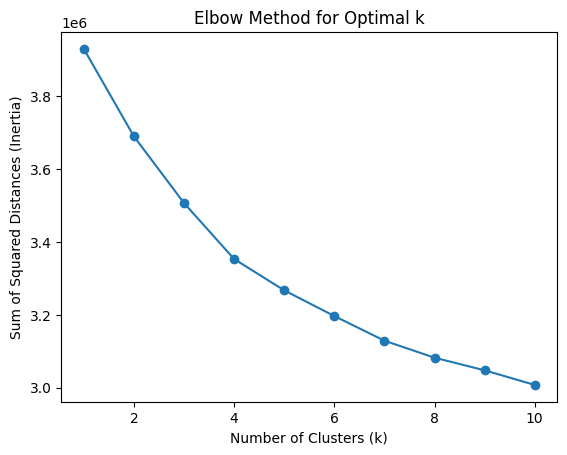

In [73]:
# Load the preprocessed images list
X = feature_list

# Function to calculate the sum of squared distances (inertia)
def calculate_inertia(data, k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    return kmeans.inertia_

# Elbow method
def elbow_method(data, max_k):
    inertias = []
    for k in range(1, max_k + 1):
        inertias.append(calculate_inertia(data, k))

    # Plotting the elbow curve
    plt.plot(range(1, max_k + 1), inertias, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Distances (Inertia)')
    plt.show()

# Specify the maximum number of clusters to consider
max_clusters = 10

# Run the elbow method
elbow_method(X, max_clusters)


Elbow method says number of clusters should be 4. Hence I'm running my model with num_clusters as 4

In [116]:
image_folder_path = "all_images"

# Decide the number of clusters
num_clusters = 4

# Perform K-means clustering
kmeans_4 = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans_4.fit_predict(feature_list)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [117]:
# Create a dictionary to store the cluster assignment for each image
cluster_mapping = {}
for i, label in enumerate(cluster_labels):
    img_file = image_files[i]
    if label not in cluster_mapping:
        cluster_mapping[label] = [img_file]
    else:
        cluster_mapping[label].append(img_file)

# Output the dictionary
print(cluster_mapping)


output_folder = 'clustered_images'
os.makedirs(output_folder, exist_ok=True)

for cluster_id, cluster_images in cluster_mapping.items():
    cluster_folder = os.path.join(output_folder, f'Cluster_{cluster_id}')
    os.makedirs(cluster_folder, exist_ok=True)
    for img_file in cluster_images:
        img_path = os.path.join(image_folder_path, img_file)
        new_img_path = os.path.join(cluster_folder, img_file)
        shutil.copy(img_path, new_img_path)

{3: ['5623492051_8e5ce438bd.jpg', '7012366081_019c8a17a4_m.jpg', '16041975_2f6c1596e5.jpg', '3554992110_81d8c9b0bd_m.jpg', '3675486971_d4c8683b54_n.jpg', '2535769822_513be6bbe9.jpg', '14185089716_2a48298d17.jpg', '8209318399_ae72aefdb5.jpg', '2467980325_237b14c737_m.jpg', '3533075436_0954145b9f_m.jpg', '4632863567_5f9af7de97_n.jpg', '3584414925_1e6c4b61db_n.jpg', '10946896405_81d2d50941_m.jpg', '5416388641_c66d52d2ff_m.jpg', '2503034372_db7867de51_m.jpg', '2634666217_d5ef87c9f7_m.jpg', '9152356642_06ae73113f.jpg', '18996965033_1d92e5c99e.jpg', '14396023703_11c5dd35a9.jpg', '10443973_aeb97513fc_m.jpg', '11595255065_d9550012fc.jpg', '4696437766_85952d0196.jpg', '4847150510_7a5db086fa.jpg', '17029965300_8e755c2214_n.jpg', '2625836599_03e192266f.jpg', '4155914848_3d57f50fc7.jpg', '8733226215_161309f8ec.jpg', '4634716478_1cbcbee7ca.jpg', '18276105805_d31d3f7e71.jpg', '3445110406_0c1616d2e3_n.jpg', '6655078437_759fd626fd_n.jpg', '8797114213_103535743c_m.jpg', '13555215723_cf2c11626b_b.jpg', 

**The silhouette score** quantifies the cohesion and separation of clusters in a dataset. Ranging from -1 to 1, a higher silhouette score indicates well-defined clusters with members closer to each other than to members of neighboring clusters. It aids in evaluating the quality of clustering solutions, assisting in the selection of optimal cluster configurations.

In [118]:
# Calculate Silhouette Score for model evaluation
silhouette_avg = silhouette_score(feature_list, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.05723409727215767


Since we know there should be 5 cluster for 5 different type of flowers. Let's also run the code with num_clusters as 5

In [119]:
# Decide the number of clusters
num_clusters = 5

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(feature_list)

# Create a dictionary to store the cluster assignment for each image
# Create a dictionary to store the cluster assignment for each image
cluster_mapping = {}
for i, label in enumerate(cluster_labels):
    img_file = image_files[i]
    if label not in cluster_mapping:
        cluster_mapping[label] = [img_file]
    else:
        cluster_mapping[label].append(img_file)

# Output the dictionary
print(cluster_mapping)


output_folder = 'clustered_images'
os.makedirs(output_folder, exist_ok=True)

for cluster_id, cluster_images in cluster_mapping.items():
    cluster_folder = os.path.join(output_folder, f'Cluster_{cluster_id}')
    os.makedirs(cluster_folder, exist_ok=True)
    for img_file in cluster_images:
        img_path = os.path.join(image_folder_path, img_file)
        new_img_path = os.path.join(cluster_folder, img_file)
        shutil.copy(img_path, new_img_path)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(feature_list, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{4: ['5623492051_8e5ce438bd.jpg', '16041975_2f6c1596e5.jpg', '3554992110_81d8c9b0bd_m.jpg', '3675486971_d4c8683b54_n.jpg', '2535769822_513be6bbe9.jpg', '14185089716_2a48298d17.jpg', '8209318399_ae72aefdb5.jpg', '2467980325_237b14c737_m.jpg', '3533075436_0954145b9f_m.jpg', '4632863567_5f9af7de97_n.jpg', '3584414925_1e6c4b61db_n.jpg', '10946896405_81d2d50941_m.jpg', '2503034372_db7867de51_m.jpg', '2634666217_d5ef87c9f7_m.jpg', '9152356642_06ae73113f.jpg', '18996965033_1d92e5c99e.jpg', '14396023703_11c5dd35a9.jpg', '10443973_aeb97513fc_m.jpg', '11595255065_d9550012fc.jpg', '4696437766_85952d0196.jpg', '17029965300_8e755c2214_n.jpg', '2625836599_03e192266f.jpg', '4155914848_3d57f50fc7.jpg', '8733226215_161309f8ec.jpg', '4634716478_1cbcbee7ca.jpg', '18276105805_d31d3f7e71.jpg', '8797114213_103535743c_m.jpg', '3857059749_fe8ca621a9.jpg', '1074999133_1e4a1e042e.jpg', '14914603395_b271ffab56_n.jpg', '3954167682_128398bf79_m.jpg', '8327657321_2cbceec396_n.jpg', '4573886520_09c984ecd8_m.jpg', '1

We know that bigger the value of the silhouette score better is the prediction. Hence, from both the silhouette scores we conclude that the score is better with num_clusters as 5 as compared to 4.

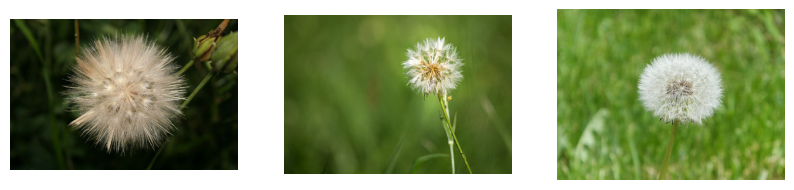

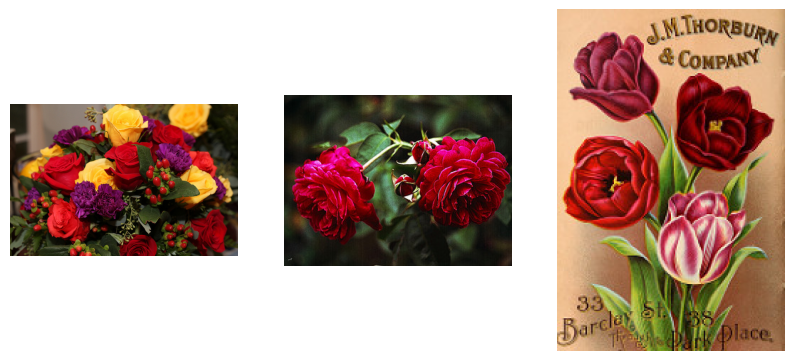

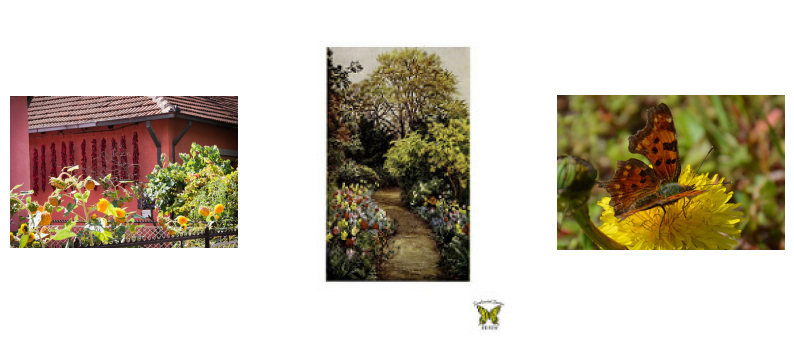

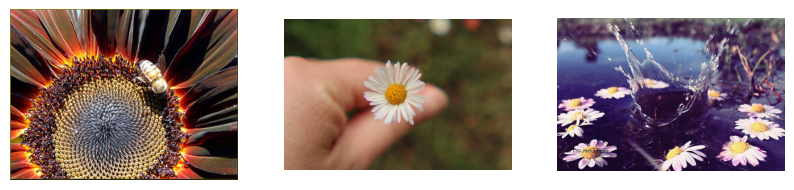

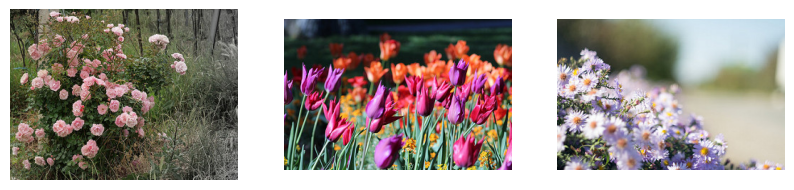

In [122]:
# Function to display random images from all the clusters of a model where number of Cluster=5
def show_random_images(cluster_images, cluster_id, num_images=3):
    random_images = random.sample(cluster_images, min(num_images, len(cluster_images)))
    plt.figure(figsize=(10, 5))
    for i, img_file in enumerate(random_images):
        img_path = os.path.join(output_folder, f'Cluster_{cluster_id}', img_file)
        img = plt.imread(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        #plt.title(img_file)
    plt.show()

# Display random images from each cluster
for cluster_id, cluster_images in cluster_mapping.items():
    show_random_images(cluster_images, cluster_id)


In [123]:
# define the top n cluster value
N_biggest_clusters = 3

# Sort the keys based on the list lengths in descending order
sorted_keys = sorted(cluster_mapping, key=lambda k: len(cluster_mapping[k]), reverse=True)

# Get the top 3 keys
top_N_keys = sorted_keys[:N_biggest_clusters]

print("Top N keys with maximum list length:", top_N_keys)


Top N keys with maximum list length: [1, 3, 0]


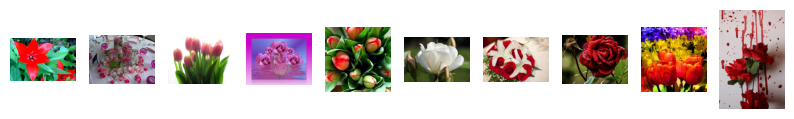

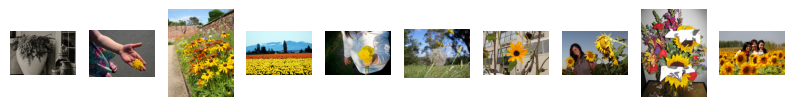

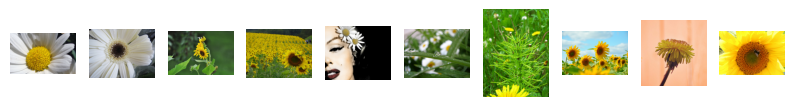

In [126]:
# Function to display random images from a N top clusters
def show_random_images(cluster_images, cluster_id, num_images=10):
    random_images = random.sample(cluster_images, min(num_images, len(cluster_images)))
    plt.figure(figsize=(10, 5))
    for i, img_file in enumerate(random_images):
        img_path = os.path.join(output_folder, f'Cluster_{cluster_id}', img_file)
        img = plt.imread(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        #plt.title(img_file)
    plt.show()

# Display random images from each cluster
for cluster_id, cluster_images in cluster_mapping.items():
    if cluster_id in top_N_keys:
      show_random_images(cluster_images, cluster_id)
